<a href="https://colab.research.google.com/github/AlexandreSAfonso/DIO_ML_Evaluation_Metrics/blob/main/ML_Evaluation_metrics_DIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculation of Learning Assessment Metrics

In this project, we will calculate the main metrics for evaluating data classification models, such as accuracy, sensitivity (recall), specificity, precision and F-score. In order to implement these functions, you must use the methods and their corresponding formulas (Table 1).

To read the values ​​of VP, VN, FP and FN, it will be necessary to choose a confusion matrix as the basis for the calculations. You can choose this matrix arbitrarily, since our goal is to understand how each metric works.

[From](https://web.dio.me/lab/calculo-de-metricas-de-avaliacao-de-aprendizado/learning/8c981faa-c9db-4a02-bad0-87035e170684?back=/track/coding-the-future-baires-dev-machine-learning-practitioner)

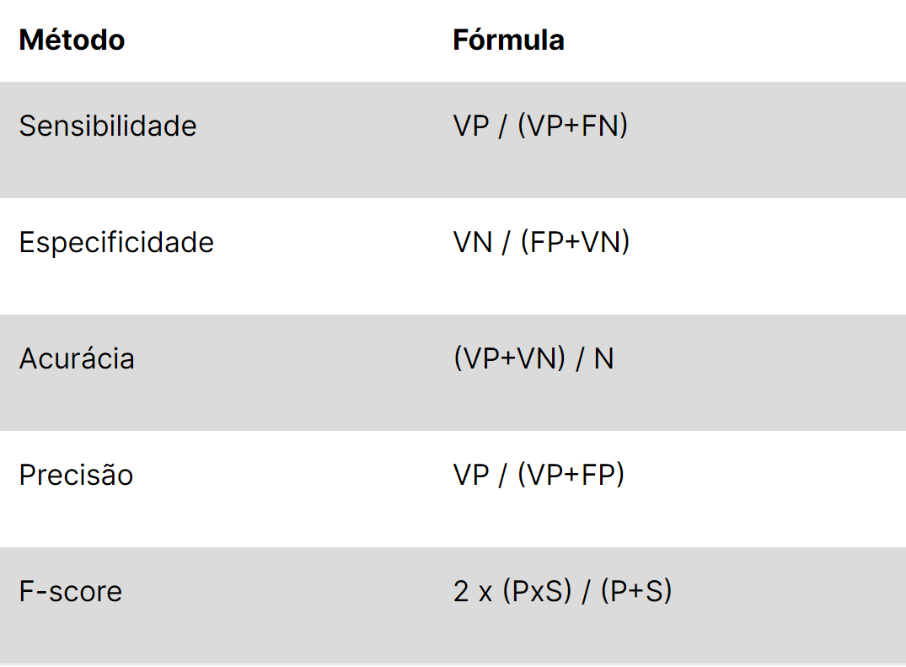



In [56]:
# importing required libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np


In [57]:
# Function to calculate evaluation metrics

def calc_accuracy (VP, VN, FP, FN):
    # Accuracy
    N = VP + VN + FP + FN
    accuracy = (VP + VN) / N if N != 0 else 0
    return accuracy

In [58]:
def calc_sense (VP, FN):
    # sense (Recall)
    sense = VP / (VP + FN) if (VP + FN) != 0 else 0
    return sense


In [59]:
def calc_specificity (VN, FP):
    # Specificity
    specificity = VN / (VN + FP) if (VN + FP) != 0 else 0
    return specificity

In [60]:
def calc_precision (VP, FP):
    # Precision
    precision = VP / (VP + FP) if (VP + FP) != 0 else 0
    return precision

In [61]:
def calc_f_score (precision, sense):
     # F-Score
    if (precision + sense) != 0:
        f_score = 2 * (precision * sense) / (precision + sense)
    else:
        f_score = 0
    return f_score

In [62]:
def calc_metrics(VP, VN, FP, FN):

    """
      Function to calculate performance evaluation metrics.

      Parameters:
        VP: True Positives
        VN: True Negatives
        FP: False Positives
        FN: False Negatives

      Returns:
        A dictionary with the values ​​of:
            Accuracy,
            Sensitivity or sense (Recall),
            Specificity,
            Precision and
            F-Score.
    """

    accuracy = calc_accuracy(VP, VN, FP, FN)
    sense = calc_sense (VP, FN)
    specificity = calc_specificity (VN, FP)
    precision = calc_precision (VP, FP)
    f_score = calc_f_score (precision, sense)


    # Dictionary return
    return {
        "Acurácia": accuracy,
        "sense (Recall)": sense,
        "Specificity": specificity,
        "Precision": precision,
        "F-Score": f_score
    }

In [63]:
# Example data (replace with your actual data)

# true labels
y_true = [0, 1, 1, 0, 1, 0, 1, 0, 1, 1]

# Predicted probabilities for the positive class
# test values y_pred_prob = [0.1, 0.6, 0.7, 0.2, 0.9, 0.4, 0.75, 0.6, 0.75, 0.3]
y_pred_prob = [0.1, 0.8, 0.7, 0.2, 0.9, 0.4, 0.85, 0.6, 0.95, 0.3]


In [64]:
# Calculating the confusion matrix

# True Positives
VP = sum(1 for t, p in zip(y_true, y_pred_prob) if t == 1 and p >= 0.5)

# True Negatives
VN = sum(1 for t, p in zip(y_true, y_pred_prob) if t == 0 and p < 0.5)

# False Positives
FP = sum(1 for t, p in zip(y_true, y_pred_prob) if t == 0 and p >= 0.5)

# False Negatives
FN = sum(1 for t, p in zip(y_true, y_pred_prob) if t == 1 and p < 0.5)

In [65]:
# Calculating performance metrics
metrics = calc_metrics(VP, VN, FP, FN)

# Displaying metrics
print("Evaluation Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")


Evaluation Metrics:
Acurácia: 0.8000
sense (Recall): 0.8333
Specificity: 0.7500
Precision: 0.8333
F-Score: 0.8333


In [66]:
# Calculate true positive rates (TPR) and false positive rates (FPR)
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)


# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

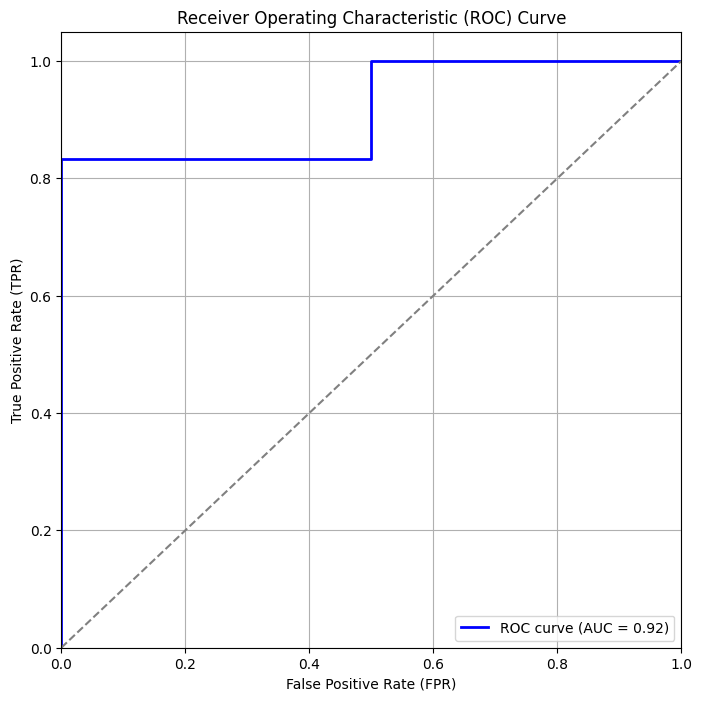

In [67]:
# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random chance)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
